In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
def get_score(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    #xglm_path = f'/{src_context_size}-1/en-{lang}/xglm-{lang}-1-1/test_score.txt'
    #llama_path = f'/1-1/en-{lang}/llama-{lang}-1-1/test_score.txt'

    lang_list = os.listdir(disk_dir + f"/{context_size}")
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    
    lang_scores = {}

    #for model_path in [xglm_path, llama_path]:
    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:    
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
       
    #print (lang_scores) #str.replace("\n", "")

    # Sample data: replace this with your actual data
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [45]:
def get_and_print_scores(scenario, model):
    comet_list, bleu_list, lang_list = get_score(scenario, model)
    print(f"{model} COMET {scenario}")
    print(comet_list)
    print()
    print(f"{model} BLEU {scenario}")
    print(bleu_list)
    print()

models = ["xglm", "llama", "Llama-2-70b-instruct-v2"]
scenarios = ["1-1", "2-1", "3-1", "4-1", "5-1"]

_, _, lang_list = get_score("1-1", "xglm")
# lang_list

print (lang_list)
print()
for model in models:
    for scenario in scenarios:
        get_and_print_scores(scenario, model)


['ar', 'fr', 'ja', 'ko', 'de', 'zh']

xglm COMET 1-1
[0.7372127388535029, 0.6437683624801279, 0.6951377419354833, 0.7196388349514563, 0.6694324414715717, 0.7457514376996807]

xglm BLEU 1-1
[9.58069426751592, 19.267324960254392, 6.017918709677419, 8.813881553398058, 14.72452173913043, 16.09243466453673]

xglm COMET 2-1
[0.7277729299363057, 0.5931515103338628, 0.6875116129032257, 0.6942359223300979, 0.6609260869565214, 0.7449750798722048]

xglm BLEU 2-1
[9.188521656050964, 15.314973449920494, 5.884684193548385, 7.816133818770233, 12.854174247491631, 15.909829552715628]

xglm COMET 3-1
[0.0, 0.5628273449920516, 0.6815887096774192, 0.0, 0.0, 0.0]

xglm BLEU 3-1
[0.0, 12.851325596184399, 5.866126774193549, 0.0, 0.0, 0.0]

xglm COMET 4-1
[0.0, 0.5513283870967742, 0.6766374193548387, 0.0, 0.0, 0.0]

xglm BLEU 4-1
[0.0, 11.548442580645165, 5.591163548387097, 0.0, 0.0, 0.0]

xglm COMET 5-1
[0.0, 0.5354986754966884, 0.6792425806451617, 0.0, 0.0, 0.0]

xglm BLEU 5-1
[0.0, 11.15573973509934, 5.699

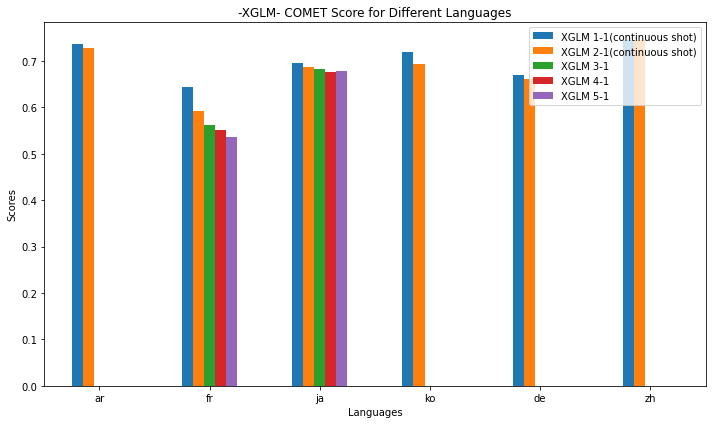

In [37]:
#XGLM 
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width*2, xglm_comet_list, width, label='XGLM 1-1(continuous shot)') # Ja, FR is not continuous shot anymore
rects2 = ax.bar(x - width, xglm_comet_list_2, width, label='XGLM 2-1(continuous shot)')
rects5 = ax.bar(x, xglm_comet_list_3, width, label='XGLM 3-1')
rects6= ax.bar(x + width, xglm_comet_list_4, width, label='XGLM 4-1')
rects7 = ax.bar(x + width*2, xglm_comet_list_5, width, label='XGLM 5-1')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-XGLM- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


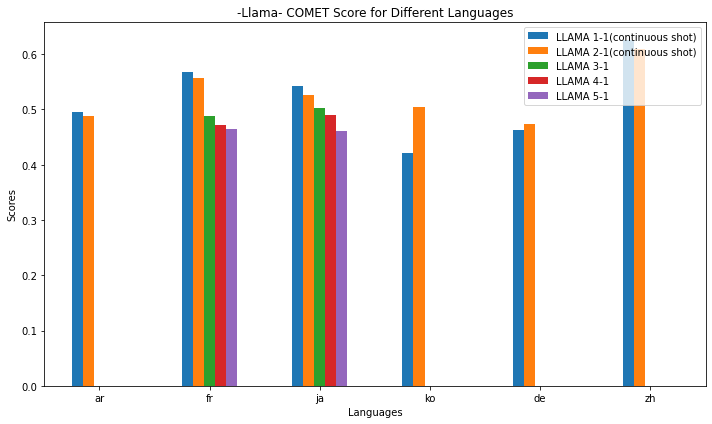

In [38]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects3 = ax.bar(x -width*2, llama_comet_list, width, label='LLAMA 1-1(continuous shot)')
rects4 = ax.bar(x-width, llama_comet_list_2, width, label='LLAMA 2-1(continuous shot)')
rects5 = ax.bar(x, llama_comet_list_3, width, label='LLAMA 3-1')
rects6= ax.bar(x + width, llama_comet_list_4, width, label='LLAMA 4-1')
rects7 = ax.bar(x + width*2, llama_comet_list_5, width, label='LLAMA 5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


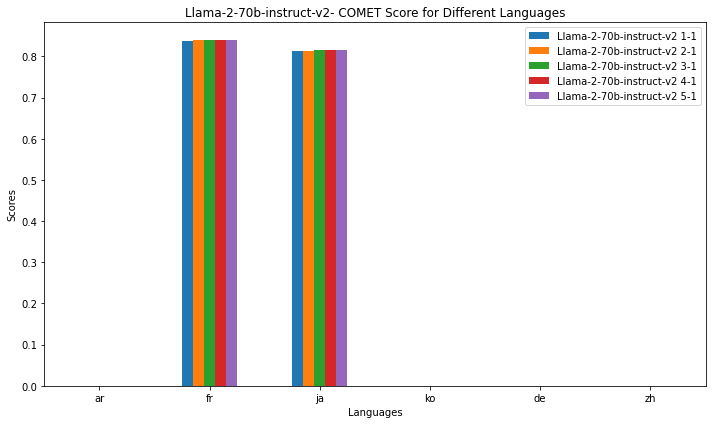

In [39]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects3 = ax.bar(x -width*2, llama2_comet_list, width, label='Llama-2-70b-instruct-v2 1-1')
rects4 = ax.bar(x-width, llama2_comet_list_2, width, label='Llama-2-70b-instruct-v2 2-1')
rects5 = ax.bar(x, llama2_comet_list_3, width, label='Llama-2-70b-instruct-v2 3-1')
rects6= ax.bar(x + width, llama2_comet_list_4, width, label='Llama-2-70b-instruct-v2 4-1')
rects7 = ax.bar(x + width*2, llama2_comet_list_5, width, label='Llama-2-70b-instruct-v2 5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('Llama-2-70b-instruct-v2- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


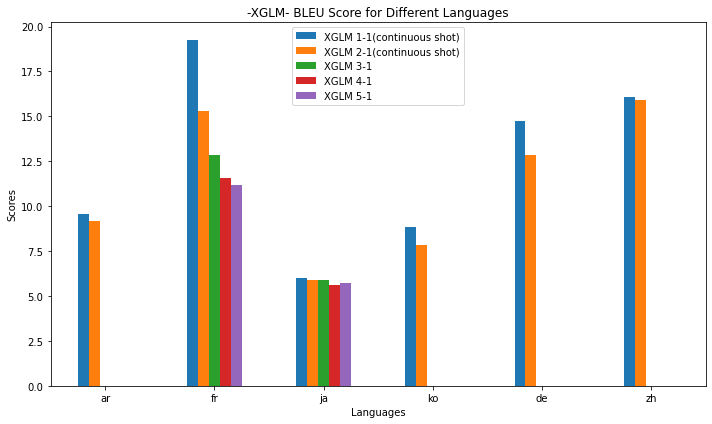

In [40]:
#XGLM 
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width*2, xglm_bleu_list, width, label='XGLM 1-1(continuous shot)')
rects2 = ax.bar(x - width, xglm_bleu_list_2, width, label='XGLM 2-1(continuous shot)')
rects5 = ax.bar(x, xglm_bleu_list_3, width, label='XGLM 3-1')
rects6= ax.bar(x + width, xglm_bleu_list_4, width, label='XGLM 4-1')
rects7 = ax.bar(x + width*2, xglm_bleu_list_5, width, label='XGLM 5-1')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-XGLM- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


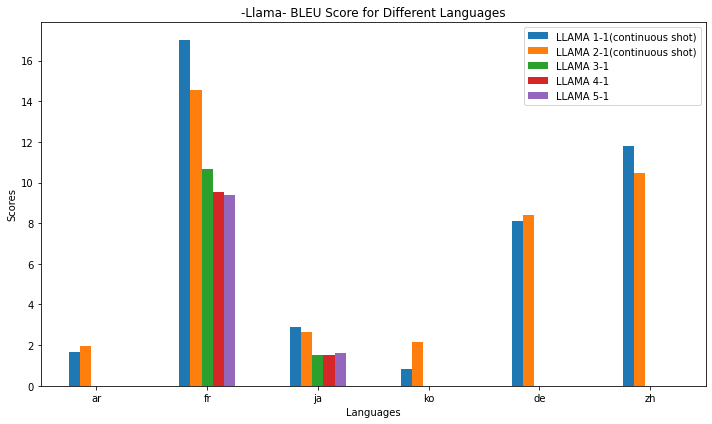

In [41]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects3 = ax.bar(x -width*2, llama_bleu_list, width, label='LLAMA 1-1(continuous shot)')
rects4 = ax.bar(x-width, llama_bleu_list_2, width, label='LLAMA 2-1(continuous shot)')
rects5 = ax.bar(x, llama_bleu_list_3, width, label='LLAMA 3-1')
rects6= ax.bar(x + width, llama_bleu_list_4, width, label='LLAMA 4-1')
rects7 = ax.bar(x + width*2, llama_bleu_list_5, width, label='LLAMA 5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


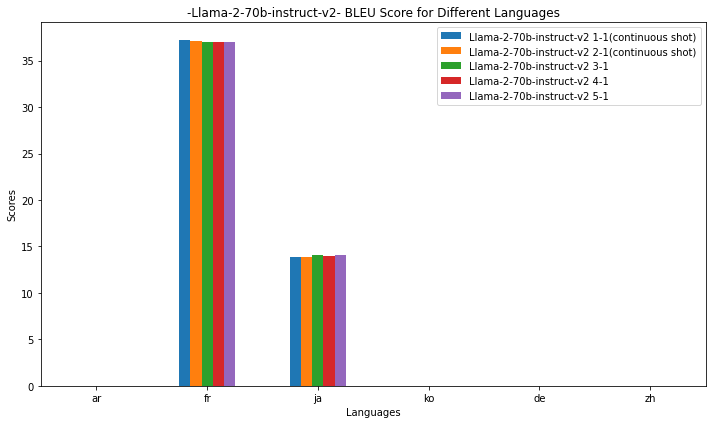

In [42]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects3 = ax.bar(x -width*2, llama2_bleu_list, width, label='Llama-2-70b-instruct-v2 1-1(continuous shot)')
rects4 = ax.bar(x-width, llama2_bleu_list_2, width, label='Llama-2-70b-instruct-v2 2-1(continuous shot)')
rects5 = ax.bar(x, llama2_bleu_list_3, width, label='Llama-2-70b-instruct-v2 3-1')
rects6= ax.bar(x + width, llama2_bleu_list_4, width, label='Llama-2-70b-instruct-v2 4-1')
rects7 = ax.bar(x + width*2, llama2_bleu_list_5, width, label='Llama-2-70b-instruct-v2 5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama-2-70b-instruct-v2- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()